In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timml as tml

In [2]:
ml = tml.ModelMaq(kaq=[1, 2], z=[10, 5, 4, 0], c=2)
xy = [(-50, 0), (50, 0), (50, 80), (-50, 80)]
p1 = tml.PolygonInhomMaq(ml, xy=xy, 
                     kaq=[1, 2], z=[10, 5, 4, 0], c=[2], 
                     topboundary='conf', N=0.01, order=5, ndeg=3)
rf = tml.Constant(ml, xr=0, yr=-1000, hr=2)
ml.solve()

Number of elements, Number of equations: 11 , 98
...........
solution complete


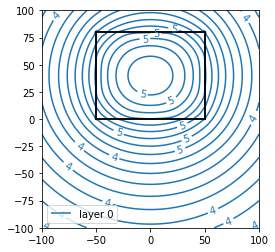

In [3]:
ml.contour(win=[-100, 100, -100, 100], ngr=100, layers=[0], levels=20, labels=False)

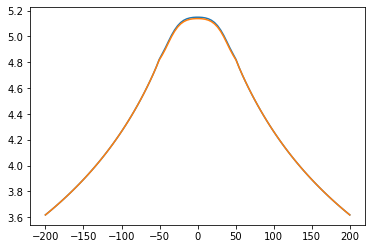

In [4]:
x = np.linspace(-200, 200, 100)
h = ml.headalongline(x, 3)
plt.plot(x, h[0])
plt.plot(x, h[1])

### Checks for numerical derivative

In [5]:
# recharge inside polygon (should be 0.01)
x = 20
y = 60
d = 0.01
d2hdx2 = (ml.head(x + d, y) - 2 * ml.head(x, y) + ml.head(x - d, y)) / (d ** 2)
d2hdy2 = (ml.head(x, y + d) - 2 * ml.head(x, y) + ml.head(x, y - d)) / (d ** 2)
d2hdx2 + d2hdy2
aqin = ml.aq.inhomlist[0]
print('recharge from numerical derivative: ', np.sum(aqin.T * (d2hdx2 + d2hdy2)))
h = ml.head(x, y)
print('leakage from aq0 to aq1 from head difference: ', (h[1] - h[0]) / aqin.c[1])
print('leakage from aq0 to aq1 from num. derivative: ', aqin.T[1] * (d2hdx2[1] + d2hdy2[1]))

recharge from numerical derivative:  -0.009999998438203761
leakage from aq0 to aq1 from head difference:  -0.006153846153845954
leakage from aq0 to aq1 from num. derivative:  -0.006153845220069343
